In [1]:
import numpy as np
import json

In [2]:
DATA_PATH = 'data.json'

with open(DATA_PATH, "r") as fp:
    data = json.load(fp)

# Loading data from extracted json file
chroma = data["chroma_vector"]
labels = data["labels"]

# Padding data to reshape data into identical shapes
max_length = max(len(arr) for arr in chroma)
chroma = [
    np.pad(
        arr,
        pad_width=((0, max_length - len(arr)), (0, 0)),  
        mode='constant',
        constant_values=0
    )
    for arr in chroma
]

chroma = np.array(chroma)
labels = np.array(labels)

print(chroma.shape)
print(labels.shape)

(1996, 290, 12)
(1996,)


In [3]:
# Reshaping 3D data into 2D to pass onto an SVM model
chroma = chroma.reshape(chroma.shape[0], -1)
print(chroma.shape)

(1996, 3480)


In [4]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(chroma, labels, test_size = 0.30, random_state = 42)

[Text(0.6588855421686747, 0.9615384615384616, 'x[1454] <= 0.67\ngini = 0.9\nsamples = 1397\nvalue = [148, 131, 127, 147, 146, 151, 130, 136, 141, 140]'),
 Text(0.42771084337349397, 0.8846153846153846, 'x[1115] <= 0.883\ngini = 0.882\nsamples = 1057\nvalue = [148.0, 91.0, 126.0, 46.0, 141.0, 150.0, 44.0, 135.0\n37.0, 139.0]'),
 Text(0.5432981927710843, 0.9230769230769231, 'True  '),
 Text(0.24397590361445784, 0.8076923076923077, 'x[825] <= 0.184\ngini = 0.856\nsamples = 783\nvalue = [143, 20, 26, 34, 139, 148, 44, 133, 37, 59]'),
 Text(0.060240963855421686, 0.7307692307692307, 'x[781] <= 0.219\ngini = 0.57\nsamples = 180\nvalue = [0.0, 10.0, 11.0, 12.0, 8.0, 7.0, 0.0, 115.0, 2.0\n15.0]'),
 Text(0.024096385542168676, 0.6538461538461539, 'x[1243] <= 0.229\ngini = 0.79\nsamples = 45\nvalue = [0.0, 2.0, 10.0, 10.0, 1.0, 1.0, 0.0, 7.0, 1.0, 13.0]'),
 Text(0.012048192771084338, 0.5769230769230769, 'gini = 0.401\nsamples = 17\nvalue = [0, 0, 0, 0, 1, 1, 0, 1, 1, 13]'),
 Text(0.0361445783132530

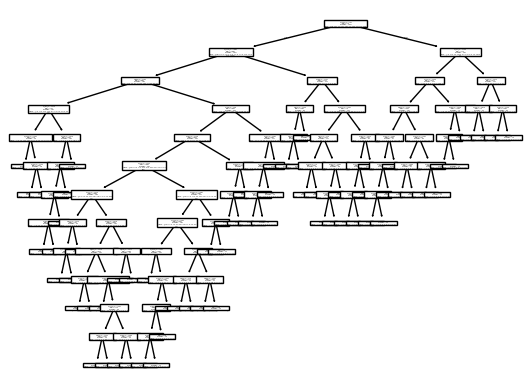

In [9]:
from sklearn import tree

det_tree = tree.DecisionTreeClassifier(max_depth = 12, min_samples_split = 10, min_samples_leaf = 10, random_state = 42)
det_tree = det_tree.fit(X_train, y_train)
tree.plot_tree(decision_tree = det_tree)

In [10]:
from sklearn.metrics import accuracy_score

preds = det_tree.predict(X_test)

accuracy = accuracy_score(preds, y_test)
print("The accuracy of the Decision Tree model is " + str(round(100 * accuracy, 3)) + "%.")

The accuracy of the Decision Tree model is 64.608%.


In [11]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators = 2000, max_depth = 12)
rand_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=2000)

In [12]:
preds = rand_forest.predict(X_test)

accuracy = accuracy_score(preds, y_test)
print("The accuracy of the Random Forest model is " + str(round(100 * accuracy, 3)) + "%.")

The accuracy of the Random Forest model is 88.815%.
